In [18]:
import pandas as pd
import re
import ast

In [19]:
import warnings
from dotenv import load_dotenv

warnings.filterwarnings('ignore')
_ = load_dotenv()

In [20]:
def parse_invoice_string(invoice_string):
    # Step 1: Split header details and line items
    header_part = invoice_string.split(" invoice_items=[")[0]
    items_part = invoice_string.split(" invoice_items=[")[1].rsplit("] invoice_total=", 1)[0]

    # Step 2: Parse the header part
    header_data = dict(re.findall(r"(\w+)=('.*?')", header_part))
    header_data = {k: v.strip("'") for k, v in header_data.items()}

    # Step 3: Clean and parse the items part
    items_part = re.sub(r"(\w+)=('.*?')", r'"\1":\2', items_part)  # Replace key='value' with "key":"value"
    items_part = re.sub(r'(\d),(\d)', r'\1\2', items_part)  # Remove commas in numbers
    items_part = items_part.replace("Invoice_Item(", "{").replace(")", "}")  # Replace Invoice_Item with {}

    # Convert the cleaned string into a list of dictionaries
    invoice_items_list = ast.literal_eval(f'[{items_part}]')

    # Step 4: Combine everything into a single row
    header_data['invoice_items'] = invoice_items_list
    header_data['invoice_total'] = invoice_string.split(" invoice_total='")[1].strip("'")

    # Step 5: Create a DataFrame with the header data as a single row
    return header_data

In [21]:
# use the function to parse the invoice strings
invoice_string_1 = """invoice_number='424218' invoice_date='2/7/2024' job_number='Multiple' attention='Tom Johns' invoice_to='Seattle Toy Box PO Box 12345 Seattle, WA 78903-1111' sales_rep='Jane Tyler' invoice_items=[Invoice_Item(quantity='53,363', description='SPU Bills (First Page)', unit_price='0.0230', u_m='ea', sub_total='1,227.35', tax='123.96', total='1,351.31'), Invoice_Item(quantity='28,042', description='SPU Bills: additional imaged pages', unit_price='0.0500', u_m='ea', sub_total='1,402.10', tax='141.61', total='1,543.71'), Invoice_Item(quantity='53,363', description='SPU Bills: generic inserts - inclusion and storage', unit_price='0.0100', u_m='ea', sub_total='533.63', tax='53.90', total='587.53'), Invoice_Item(quantity='517', description='SPU Letter Packages (First Page)', unit_price='0.0180', u_m='ea', sub_total='9.31', tax='0.94', total='10.25'), Invoice_Item(quantity='53,880', description='SPU 100W-P Envelope Usage', unit_price='0.0280', u_m='ea', sub_total='1,508.64', tax='152.37', total='1,661.01'), Invoice_Item(quantity='58,103', description='SPU 400W-P Remittance Envelope Usage', unit_price='0.0220', u_m='ea', sub_total='1,278.27', tax='129.11', total='1,407.38'), Invoice_Item(quantity='9,480', description='SPU Notice Packages (First Page)', unit_price='0.0230', u_m='ea', sub_total='218.04', tax='22.02', total='240.06'), Invoice_Item(quantity='9,480', description='SPU Notices: additional imaged pages', unit_price='0.0500', u_m='ea', sub_total='474.00', tax='47.87', total='521.87'), Invoice_Item(quantity='9,480', description='SPU 300Y-P Envelope Usage', unit_price='0.0300', u_m='ea', sub_total='284.40', tax='28.72', total='313.12'), Invoice_Item(quantity='1', description='Seattle Public Utilities Postage 1/1/24 - 1/31/24', unit_price='1,664.5700', u_m='ea', sub_total='1,664.57', tax='168.12', total='1,832.69'), Invoice_Item(quantity='1', description='01/24 Public Utilities Postage', unit_price='32,307.3800', u_m='ea', sub_total='32,307.38', tax='0.00', total='32,307.38')] invoice_total='41,776.31'"""
invoice_string_2 = """invoice_number='424216' invoice_date='2/7/2024' job_number='Multiple' attention='John Doe' invoice_to='1234-5th Ave #4567 Seattle, WA 3333' sales_rep='Jane Tyler' invoice_items=[Invoice_Item(quantity='112,937', description='SCL BIll Packages (First Page)', unit_price='0.0230', u_m='ea', sub_total='2,597.55', tax='262.35', total='2,859.90'), Invoice_Item(quantity='19,953', description='SCL BIlls: Additional imaged pages', unit_price='0.0500', u_m='ea', sub_total='997.65', tax='100.76', total='1,098.41'), Invoice_Item(quantity='112,898', description='SCL BIlls: generic inserts - inclusion and storage', unit_price='0.0100', u_m='ea', sub_total='1,128.98', tax='114.03', total='1,243.01'), Invoice_Item(quantity='3,991', description='SCL Letter Packages (First page)', unit_price='0.0180', u_m='ea', sub_total='71.84', tax='7.26', total='79.10'), Invoice_Item(quantity='117,288', description='SCL 100W-L Envelope Usage', unit_price='0.0280', u_m='ea', sub_total='3,284.06', tax='331.69', total='3,615.75'), Invoice_Item(quantity='120,588', description='SCL 400W-L Remittance Envelope Usage', unit_price='0.0220', u_m='ea', sub_total='2,652.94', tax='267.95', total='2,920.89'), Invoice_Item(quantity='7,291', description='SCL Notice Packages (FIrst Page)', unit_price='0.0230', u_m='ea', sub_total='167.69', tax='16.94', total='184.63'), Invoice_Item(quantity='7,291', description='SCL Notices: Additional imaged pages', unit_price='0.0500', u_m='ea', sub_total='364.55', tax='36.82', total='401.37'), Invoice_Item(quantity='7,291', description='SCL 300Y-L Envelope Usage', unit_price='0.0300', u_m='ea', sub_total='218.73', tax='22.09', total='240.82'), Invoice_Item(quantity='18', description='OSG 9x12 Usage - Flats', unit_price='0.3645', u_m='ea', sub_total='6.56', tax='0.66', total='7.22'), Invoice_Item(quantity='1', description='Recovery Surcharge', unit_price='2,757.7300', u_m='ea', sub_total='2,757.73', tax='278.53', total='3,036.26')] invoice_total='15,687.36'"""

# add invoice_string_1 and invoice_string_2 to a list
invoice_strings_list = [invoice_string_1, invoice_string_2]

# loop through the invoice_strings_list and add the parsed data to a pandas DataFrame
df = pd.DataFrame([parse_invoice_string(invoice_string) for invoice_string in invoice_strings_list])
print(df)

  invoice_number invoice_date job_number  attention  \
0         424218     2/7/2024   Multiple  Tom Johns   
1         424216     2/7/2024   Multiple   John Doe   

                                          invoice_to   sales_rep  \
0  Seattle Toy Box PO Box 12345 Seattle, WA 78903...  Jane Tyler   
1                1234-5th Ave #4567 Seattle, WA 3333  Jane Tyler   

                                       invoice_items invoice_total  
0  [{'quantity': '53363', 'description': 'SPU Bil...     41,776.31  
1  [{'quantity': '112937', 'description': 'SCL BI...     15,687.36  


In [22]:
# print the columns of invoice_items
print(df['invoice_items'][0][0].keys())

dict_keys(['quantity', 'description', 'unit_price', 'u_m', 'sub_total', 'tax', 'total'])


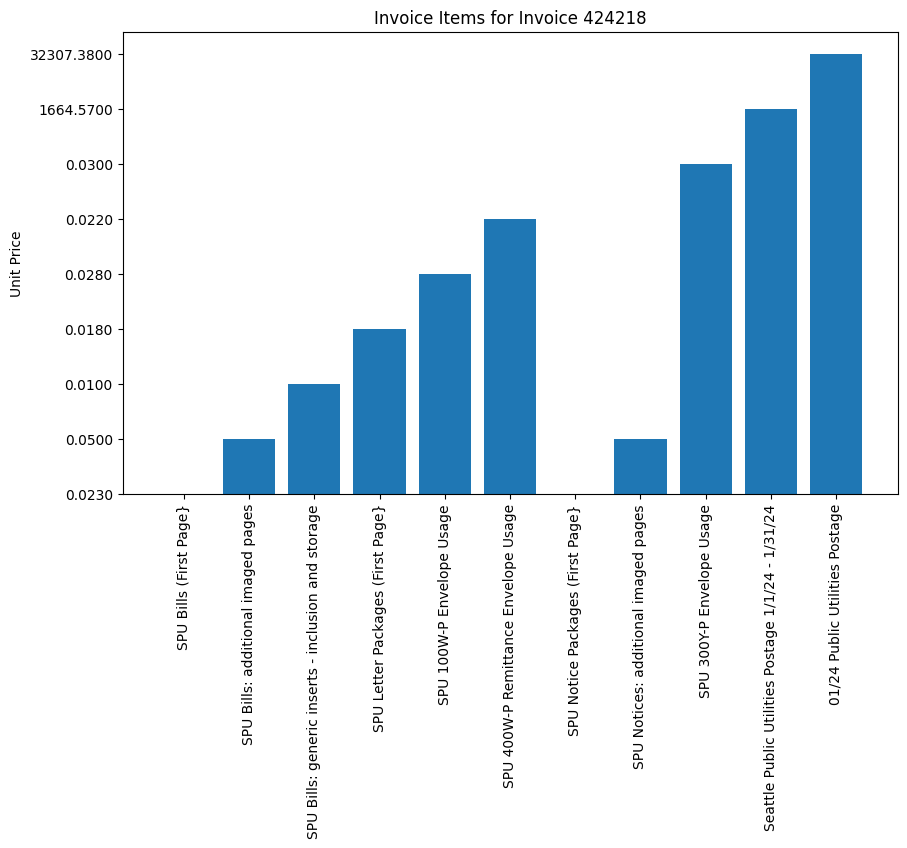

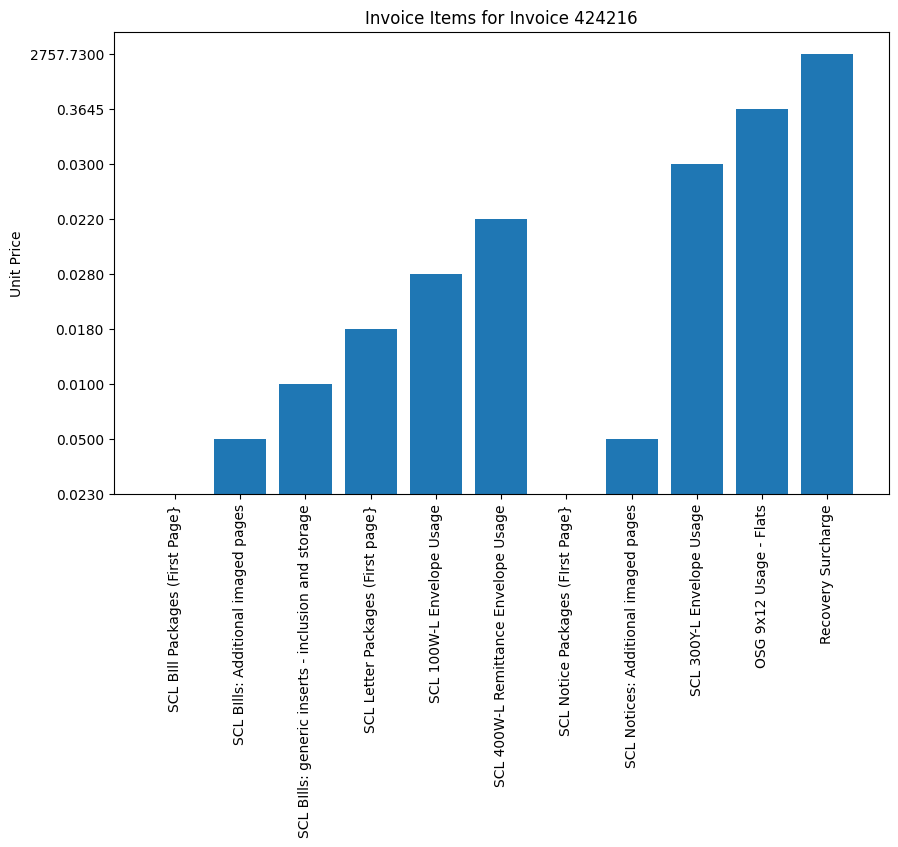

In [24]:
# draw a bar chart taking the "description" column and "unit_price" column for each and every item in the invoice_items column
import matplotlib.pyplot as plt

for i in range(len(df)):
    df['invoice_items'][i] = pd.DataFrame(df['invoice_items'][i])
    plt.figure(figsize=(10, 6))
    plt.bar(df['invoice_items'][i]['description'], df['invoice_items'][i]['unit_price'])
    plt.xticks(rotation=90)
    plt.ylabel('Unit Price')
    plt.title(f'Invoice Items for Invoice {df["invoice_number"][i]}')
    plt.show()